base model
loss is 3.1941996359635256
loss is 4.806084598274795
loss is 27.963933962131552
loss is 2.5548187437329846
stacking model
loss is 3.063070090047323


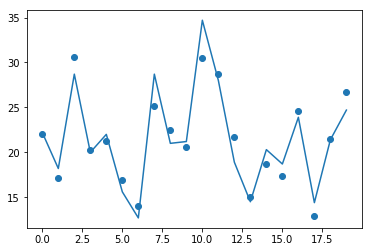

In [31]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


x, y = boston_housing_data()
x = x[:100]
y = y[:100]
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# 初始化基模型
lr = LinearRegression()
svr_lin = SVR(kernel='linear', gamma='auto')
svr_rbf = SVR(kernel='rbf', gamma='auto')
ridge = Ridge(random_state=2019)
models = [lr, svr_lin, svr_rbf, ridge]

print('base model')
for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("loss is {}".format(mean_squared_error(y_test, pred)))
sclf = StackingRegressor(regressors=models, meta_regressor=ridge)
# 训练回归器
sclf.fit(x_train, y_train)
pred = sclf.predict(x_test)

print('stacking model')
print("loss is {}".format(mean_squared_error(y_test, pred)))
plt.scatter(np.arange(len(pred)), pred)
plt.plot(np.arange(len(y_test)), y_test)
plt.show()